In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
input_data = np.array([[0,0,0],
                       [0,1,0],
                       [1,1,0],
                       [1,0,0],
                       [1,1,1],
                       [1,0,1]])

In [3]:
output_data = np.array([[0],
                        [1],
                        [0],
                        [1],
                        [1],
                        [0]])

In [4]:
def sigmoid(x):
    return (1)/(1 + np.exp(-x))

In [5]:
def dsigmoid(x):
    return x*(1-x)

In [6]:
np.random.seed(3)   #generates a value between 3
w0 = np.random.random((3,2)) -1  #between layers 0 and 1
w1 = np.random.random((2,1)) -1  #between layers 1 and 2

b0 = np.random.random((1,1)) -1
b1 = np.random.random((1,1)) -1

In [17]:
def feed_forward(data_in, w0, w1, b0, b1):
    layer0 = data_in
    layer1 = sigmoid(np.dot(layer0, w0)+b0)
    layer2 = sigmoid(np.dot(layer1, w1)+b1)
    
    return layer0, layer1, layer2

In [18]:
def back_propagation(layer0, layer1, layer2, actual_y, w0, w1, b0, b1, learning_rate, i):
    
    l2_error = layer2 - actual_y
    l2_delta = l2_error * dsigmoid(layer2)
    dh2 = np.dot(layer1.T, l2_delta)
    
    l1_error = np.dot(l2_delta, w1.T)
    l1_delta = l1_error * dsigmoid(layer1)
    dh1 = np.dot(layer0.T, l1_delta)
    
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)

    b1 = b1 - (learning_rate * np.mean(l2_delta))
    b0 = b0 - (learning_rate * np.mean(l1_delta))
    
    if i%1 == 0 and (i!=0):
        loss = np.mean(np.power(layer2 - actual_y, 2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%1 == 0:
            print('\n', int(i), loss)
            
    return w0, w1, b0, b1

In [19]:
def accuracy(testx, testy):
    correct = 0
    layer0, layer1, layer2 = feed_forward(testx, w0, w1, b0, b1)
    for i in range(len(testx)):
        if np.argmax(layer2[i]) == np.argmax(testy[i]):
            correct += 1
            
    return f"Accuracy: {correct * 100 / len(testy)}"       

In [20]:
epochs = 10
loss_curve = []
iters = []

In [21]:
for i in range(epochs):
    layer0, layer1, layer2 = feed_forward(input_data, w0, w1, b0, b1)
    w0, w1, b0, b1 = back_propagation(layer0, layer1, layer2, output_data, w0, w1, b0, b1, 0.05, i)


 1 0.28596543787416656

 2 0.2856905392236356

 3 0.28541721013515453

 4 0.2851454456896392

 5 0.2848752409333268

 6 0.284606590878354

 7 0.284339490503336

 8 0.2840739347539442

 9 0.28380991854348464


In [22]:
accuracy([[0,1,1]], [[0]])

'Accuracy: 100.0'

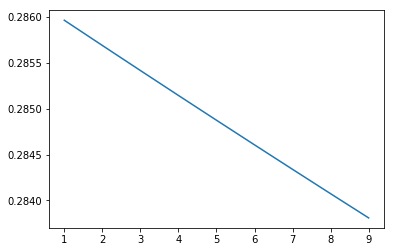

In [23]:
plt.plot(iters, loss_curve)

In [25]:
feed_forward([0,1,1], w0, w1, b0, b1)

([0, 1, 1], array([[0.1443116 , 0.17381477]]), array([[0.31099727]]))